Getting Started with "MatLab"

In [24]:
# written by Tanner Yilmaz
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches 
import math
plt.style.use('seaborn-whitegrid') #puts gridlines in background of plot

time = np.array([1,2,4,5,7,8,9])
temp = np.array([11.3, 12.9, 21.5, 21.5, 25.3, 27.0, 39.2])
ee = np.array([1, 1, 2, 2, 3, 3, 3])

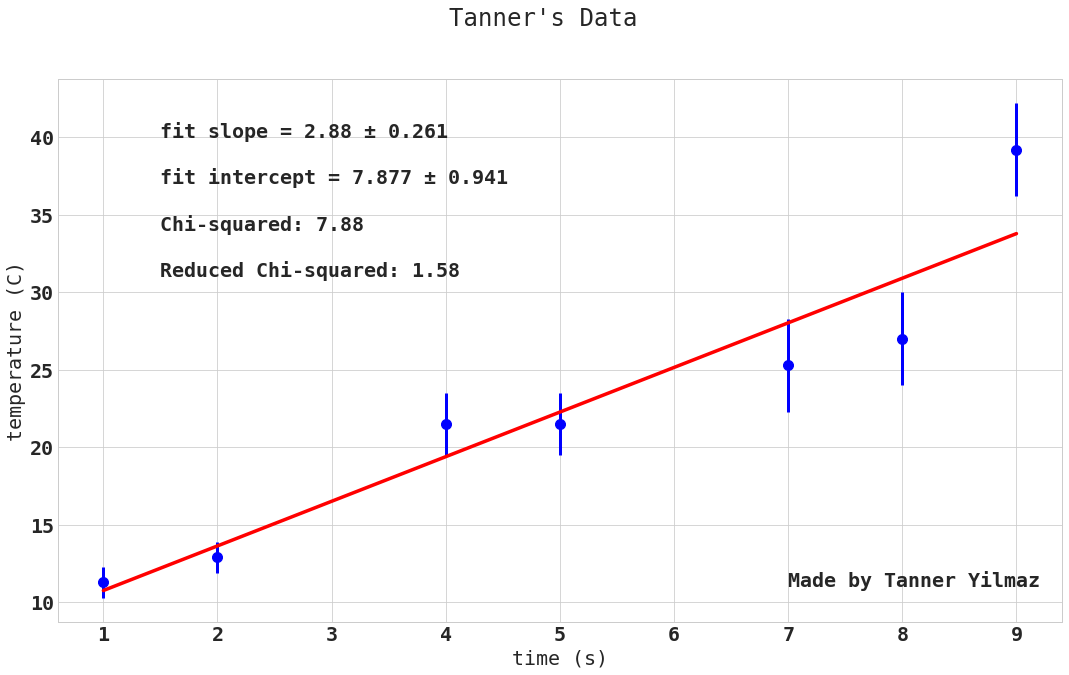

In [35]:
plt.errorbar(time, temp, yerr = ee, fmt = "bo", markersize = "10", linewidth=3)
plt.xlabel("time (s)")
plt.ylabel("temperature (C)")
plt.suptitle("Tanner's Data")

delta = sum(1/ee**2) * sum(time**2/ee**2) - (sum(time/ee**2))**2
m = (sum(1/ee**2) * sum(time*temp/ee**2) - sum(time/ee**2) * sum(temp/ee**2)) / delta
b = (sum(time**2/ee**2) * sum(temp/ee**2) - sum(time/ee**2) * sum(time*temp/ee**2)) / delta

errm = math.sqrt(sum(1/ee**2) / delta)
errb = math.sqrt(sum(time**2/ee**2) / delta)

deg_of_freedom = 5
#calculating chi-squared
chisq = sum((temp - fittemp)**2/ee**2)
reduced_chisq = chisq / deg_of_freedom

m_rounded = str(round(float(m), 3))
merr_rounded = str(round(float(errm), 3))
b_rounded = str(round(float(b), 3))
berr_rounded = str(round(float(errb), 3))
chisq_rounded = str(round(float(chisq), 2))
reduced_chisq_rounded = str(round(float(reduced_chisq), 2))

plt.plot(time, m*time + b, "-r", linewidth = 3.5)#plots the line of best fit
plt.text(1.5, 40, "fit slope = " + m_rounded + u" \u00B1 " + merr_rounded) #u"\u00B1" is used to print the plus/minus symbol 
plt.text(1.5, 37, "fit intercept = " + b_rounded + u" \u00B1 " + berr_rounded)
plt.text(1.5, 34, "Chi-squared: " + str(chisq_rounded))
plt.text(1.5, 31, "Reduced Chi-squared: " + str(reduced_chisq_rounded))
plt.text(7, 11, "Made by Tanner Yilmaz")
fittemp = m*(time) + b

#customizing plot size
plt.gcf().set_size_inches(18, 10) 

#customizing font style
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)

plt.savefig("fig_1.png")
